In [1]:
import sys

cfg = open('/Users/artyom/Software/pythia/pythia8307/Makefile.inc')
lib = '../lib'

for line in cfg:

    if line.startswith('PREFIX_LIB='): lib = line[11:-1]; break
    
sys.path.insert(0, lib)

import pythia8

In [3]:
pythia = pythia8.Pythia('printBanner = false')

events = int(1e2)
N = 0

output = open('data/211.csv', 'w')
output.write('pT,xF,E\n')

pythia.readFile("config.cmnd")

pythia.init()

for event in range(events):

    if not pythia.next(): continue
    
    entries = pythia.event.size()

    for j in range(entries):

        id = pythia.event[j].id()
        
        if int(id) == 211:

            pT = pythia.event[j].pT()
            xF = 2 * pythia.event[j].pz() / 17.27
            E = pythia.event[j].e()

            output.write('{},{},{}\n'.format(pT, xF, E))

        N += 1

sig = pythia.getSigmaTotal()

pythia.stat()

output.close()


 *------------------------------------------------------------------------------------* 
 |                                                                                    | 
 |  *------------------------------------------------------------------------------*  | 
 |  |                                                                              |  | 
 |  |                                                                              |  | 
 |  |   PPP   Y   Y  TTTTT  H   H  III    A      Welcome to the Lund Monte Carlo!  |  | 
 |  |   P  P   Y Y     T    H   H   I    A A     This is PYTHIA version 8.307      |  | 
 |  |   PPP     Y      T    HHHHH   I   AAAAA    Last date of change: 25 Feb 2022  |  | 
 |  |   P       Y      T    H   H   I   A   A                                      |  | 
 |  |   P       Y      T    H   H  III  A   A    Now is 09 Oct 2022 at 19:45:32    |  | 
 |  |                                                                              |  | 
 |  |   Program docu

AttributeError: module 'pythia8' has no attribute 'SigmaTotal'

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('data/211.csv')
ref = pd.read_csv('xsect_piplus.txt', sep=' ')

In [8]:
xF_bin = np.array([0, 0.01, 0.02, 0.025, 0.03, 0.04, 0.05, 0.06, 0.07, 0.075, 0.08, 0.1, 0.12, 0.15, 0.2, 0.25, 0.3, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85])
pT_bin = np.array([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.7, 1.9, 2.1])

In [9]:
mask_for_bin = (data['xF'] > 0) * (data['xF'] < 0.01) * (data['pT'] > 0.05) * (data['pT'] < 0.1)

sigma_trig = 28.23
dn = data[mask_for_bin]['E'].size
dp3 = 0.05 * 0.01
E = data[mask_for_bin]['E']
xsect = (E * (sigma_trig / N) * (dn / dp3)).mean()

In [10]:
xsect

3.1554835239359313

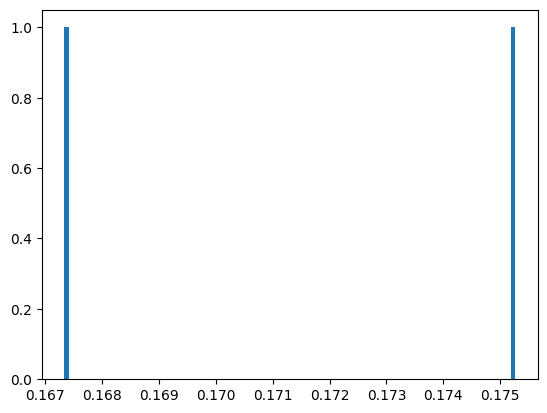

In [11]:
plt.hist(E, bins=100)
plt.show()